<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Скользящее среднее</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренды и сезонность</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Стационарные-ряды" data-toc-modified-id="Стационарные-ряды-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Стационарные ряды</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разности-временного-ряда" data-toc-modified-id="Разности-временного-ряда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разности временного ряда</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Функция-для-анализа" data-toc-modified-id="Функция-для-анализа-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Функция для анализа</a></span></li><li><span><a href="#Модели" data-toc-modified-id="Модели-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

!pip install -U scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-pastel')
import seaborn as sns 
import numpy as np 
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from time import time
from tqdm import tqdm

C:\Users\granu\anaconda3\envs\praktikum_env_win_new\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates = ['datetime'])
except:
    data = pd.read_csv("W:/Anaconda/Data Science/datasets/taxi.csv", parse_dates = ['datetime'])
data

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


In [3]:
data.info()
print('Монотонность индекса:',data.index.is_monotonic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB
Монотонность индекса: True


In [4]:
data['datetime'] = data['datetime'].sort_values().reset_index(drop=True)

C:\Users\granu\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\granu\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\granu\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\granu\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\axes\_base.py:

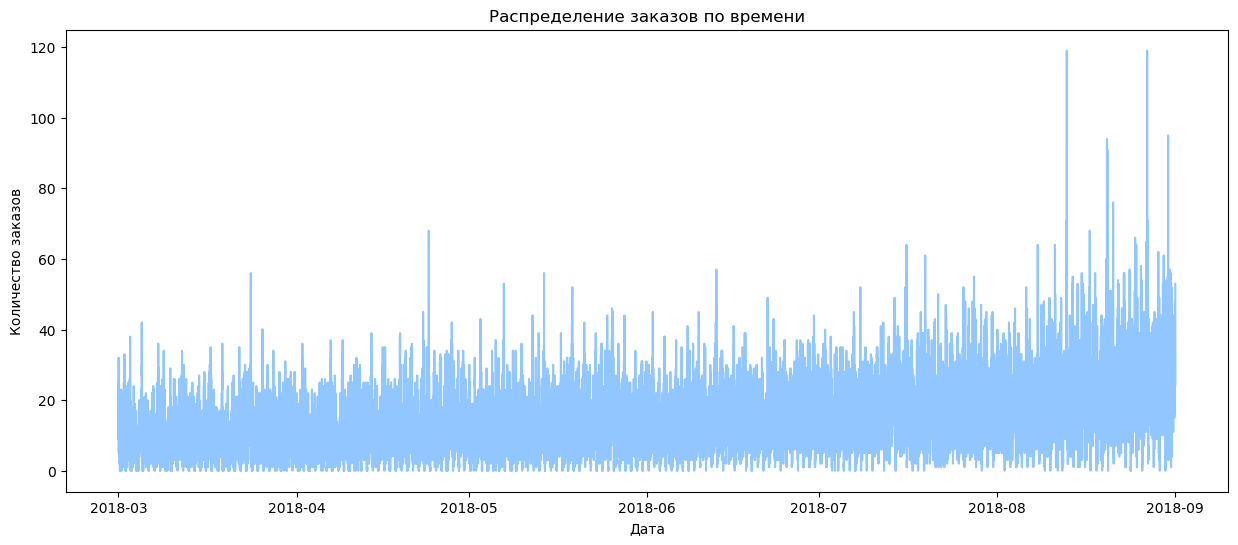

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(data['datetime'], data['num_orders'])
plt.title('Распределение заказов по времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

Сделаю ресемплинг по 1 часу:

In [6]:
data = data.set_index(['datetime']).resample('1H').sum()

In [7]:
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


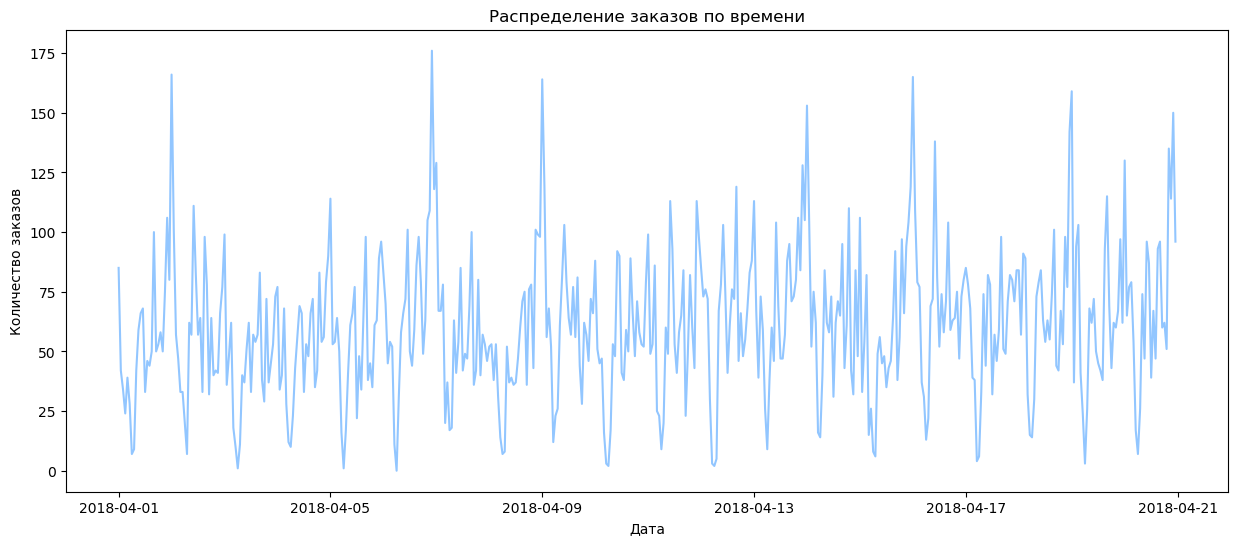

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(data['2018-04-01': '2018-04-20'])
plt.title('Распределение заказов по времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

### Вывод: 
- Данные загружены. 
- Даты переведены в формат `datetime64`. 
- Сделан ресемплинг по 1 часу

## Анализ

Для анализа будем использовать следующие методы:
1. Скользящее среднее
2. Тренды и сезонность
3. Стационарные ряды
4. Разности временного ряда

### Скользящее среднее

Т.к. данные указаны за 1 час, возьмём среднее за день, т.е. 24 часа

In [9]:
rolling_mean= data.rolling(24).mean()

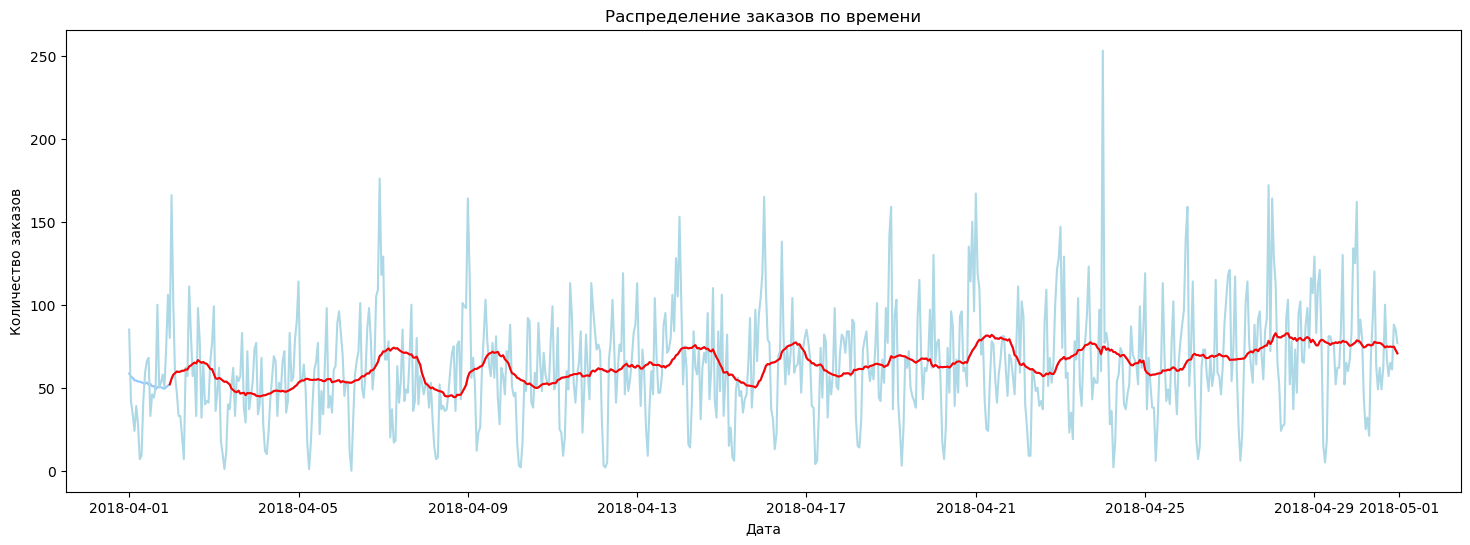

In [10]:
plt.figure(figsize=(18, 6))
plt.plot(rolling_mean['2018-04-01': '2018-04-30'])
plt.plot(data['2018-04-01':'2018-04-30'], color ='lightblue')
plt.plot(data['2018-04-01':'2018-04-30'].rolling(24).mean(), color='red')
plt.title('Распределение заказов по времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод
У скользяшего среднего наблюдается переодичность каждые 7 дней, скорей всего это выходные дни и понедельники

### Тренды и сезонность

In [11]:
decomposed = seasonal_decompose(data)

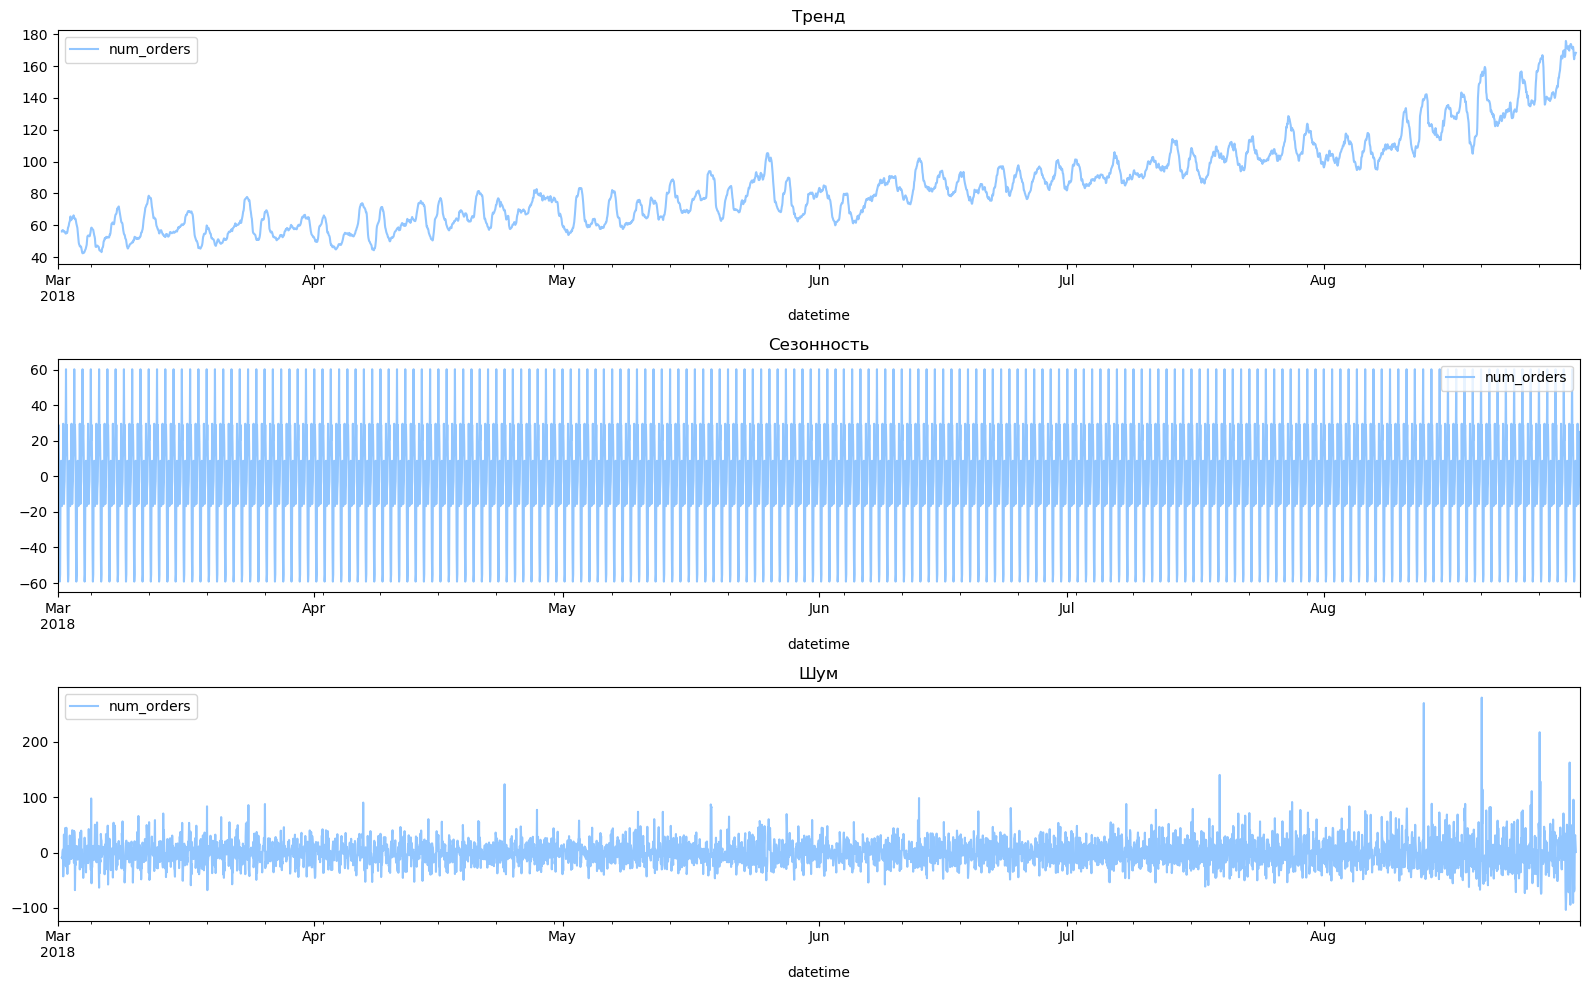

In [12]:
plt.figure(figsize=(16, 10))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')


plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонность')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
# < напишите код здесь >
plt.title('Шум')
plt.tight_layout()

Увеличю график сезонность, для более детального анализа

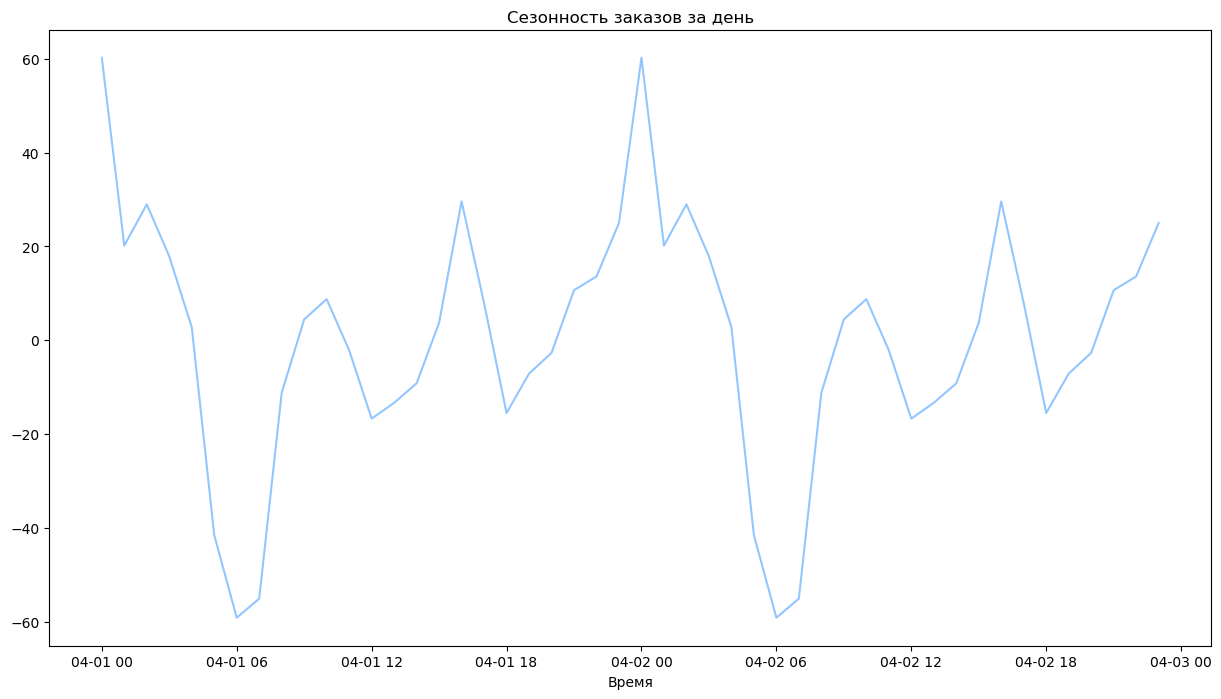

In [13]:
plt.figure(figsize=(15,8))
plt.plot(decomposed.seasonal['2018-04-01':'2018-04-2'])
plt.title('Сезонность заказов за день')
plt.xlabel('Время')
plt.show()

#### Вывод

- Из графика тренда, можно сказать, что число заказов такси увеличивается к концу лета
- Тоже самое видно из графика шума
- Сезонность за день следующая: минимум заказов в 6 утра, присутствуют скачки в 11 и 17 часов, это время обеда и конец рабочего дня, так же сильно возрастает к ночи, скорей всего, к тому времени перестают ходить общественный транспорт

### Стационарные ряды

Выведу стационарный отклонение вместе со скользящим средним, чтобы можно было оценить стационарность ряда.   
Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды (англ. stationary time series) — это ряды, у которых среднее и стандартное отклонение не меняются.  

Эта проверка нужна, для дальнейшего обучения нейросети, если ряд нестационарный, то его сложно будет прогнозировать

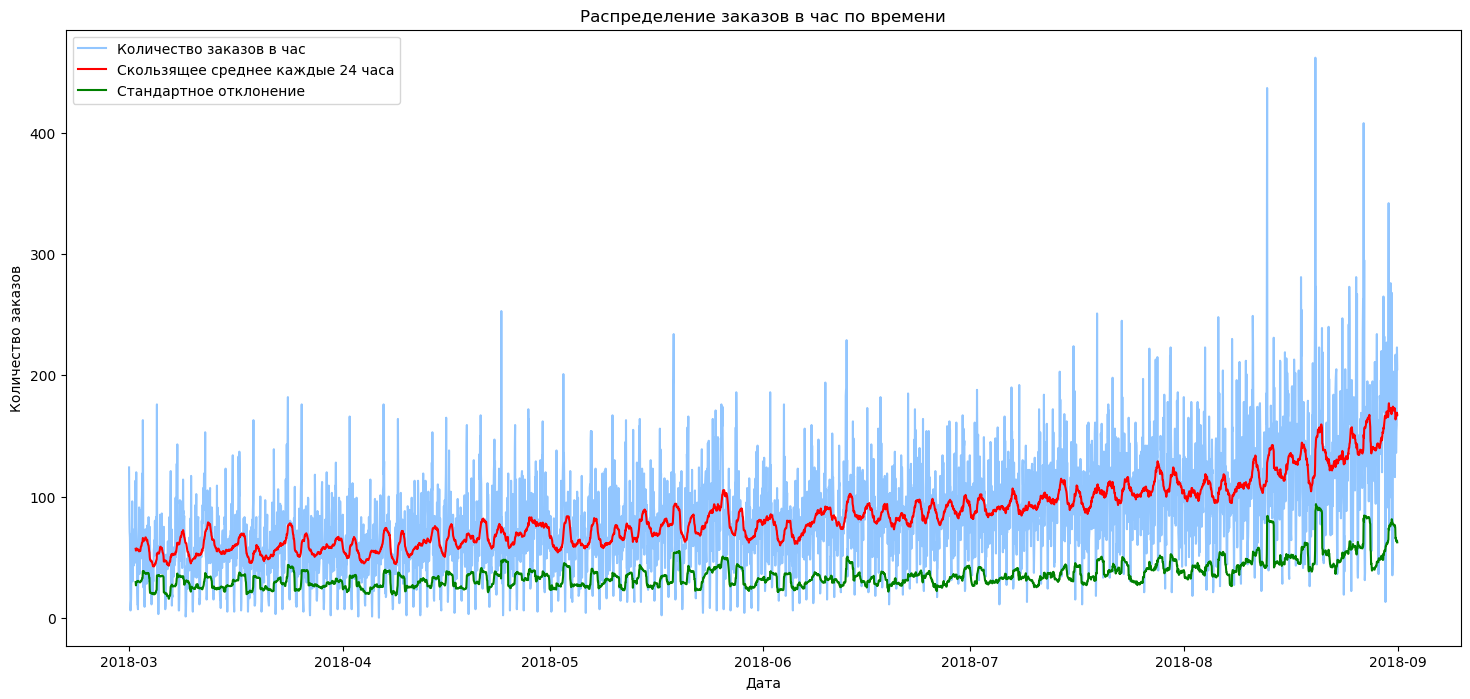

In [14]:
plt.figure(figsize=(18, 8))
plt.plot(data)
plt.plot(data.rolling(24).mean(), color='red')
plt.plot(data.rolling(24).std(), color='green')
plt.title('Распределение заказов в час по времени')
plt.legend(['Количество заказов в час', 'Скользящее среднее каждые 24 часа', 'Стандартное отклонение'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод

Среднее значение меняется со временем, после начала августа, когда подскакивает число заказов, после этой даты, ряд нестационарен

### Разности временного ряда

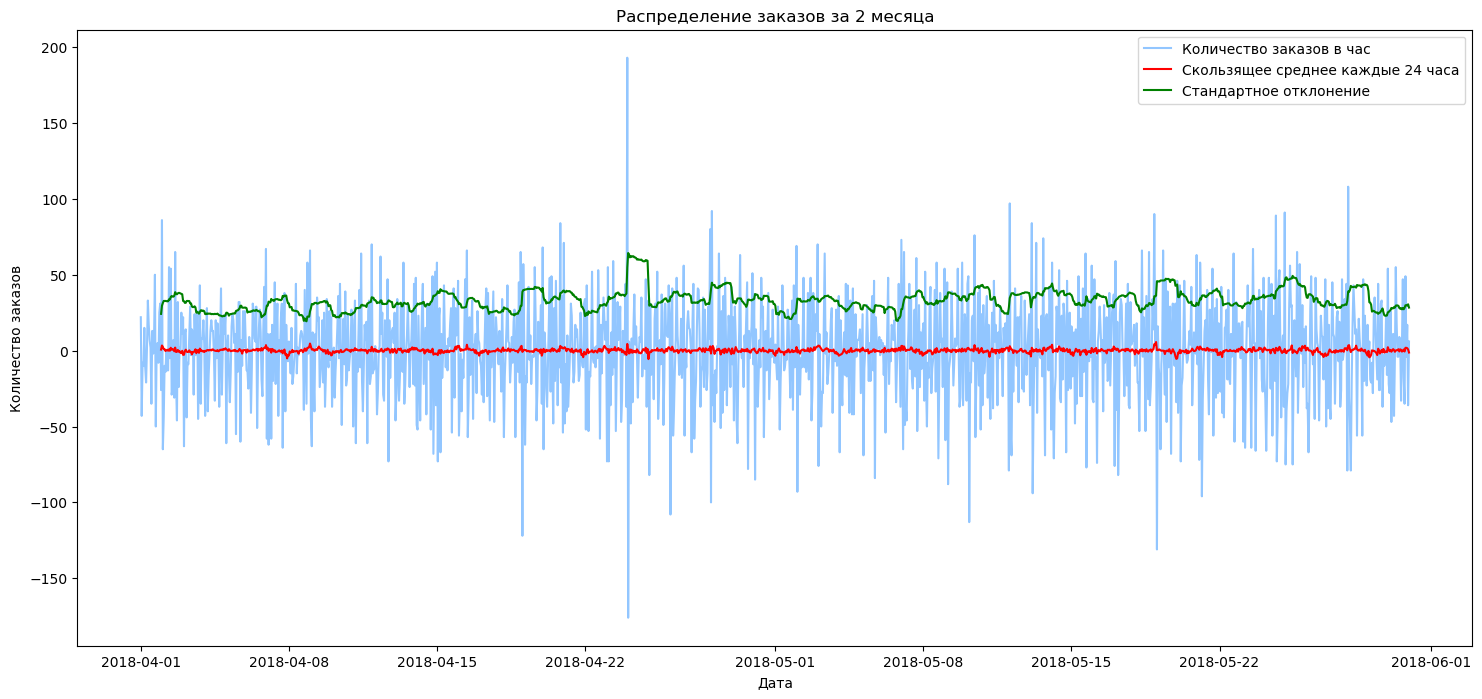

In [15]:
#Рассмотрю промежуток
tsd = data- data.shift()

plt.figure(figsize=(18, 8))
plt.plot(tsd['2018-04-01':'2018-05-30'])
plt.plot(tsd['2018-04-01':'2018-05-30'].rolling(24).mean(), color='red')
plt.plot(tsd['2018-04-01':'2018-05-30'].rolling(24).std(), color='green')
plt.title('Распределение заказов за 2 месяца')
plt.legend(['Количество заказов в час', 'Скользящее среднее каждые 24 часа', 'Стандартное отклонение'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

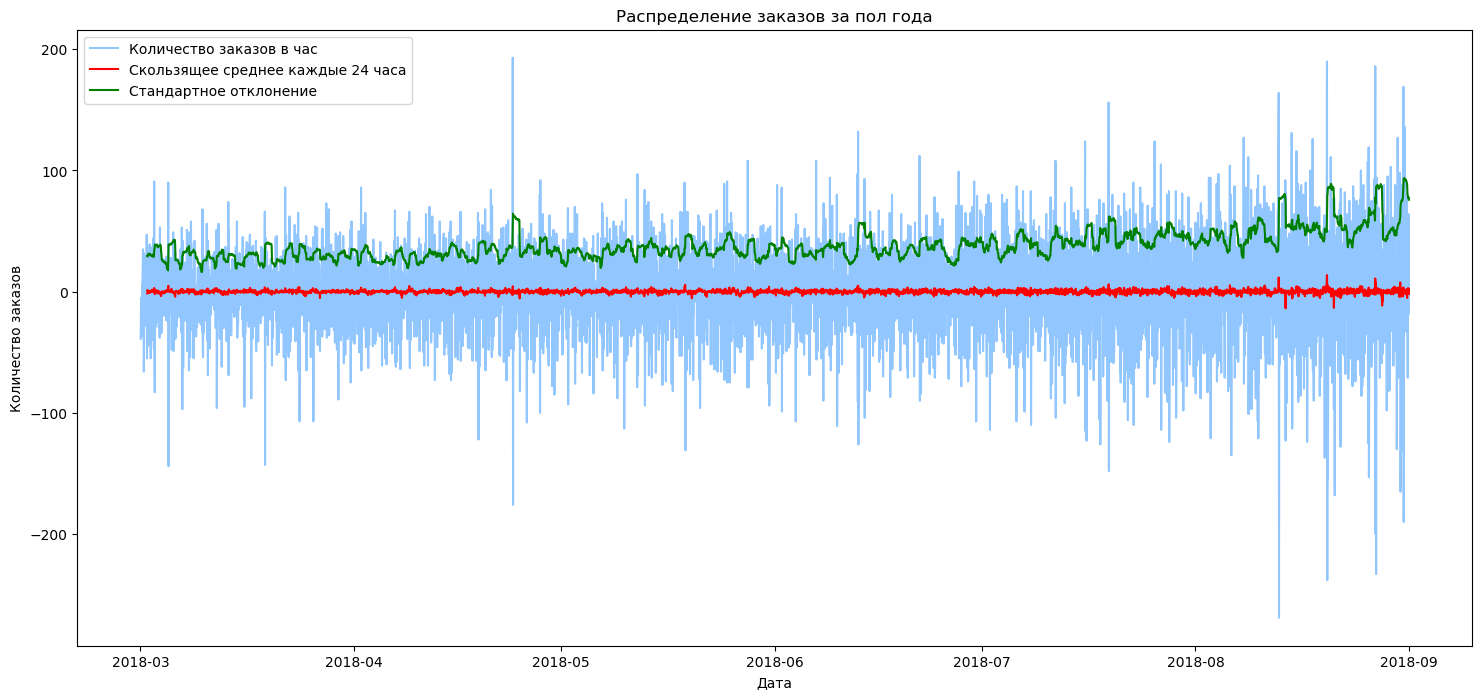

In [16]:
plt.figure(figsize=(18, 8))
plt.plot(tsd)
plt.plot(tsd.rolling(24).mean(), color='red')
plt.plot(tsd.rolling(24).std(), color='green')
plt.title('Распределение заказов за пол года')
plt.legend(['Количество заказов в час', 'Скользящее среднее каждые 24 часа', 'Стандартное отклонение'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

#### Вывод

Среднее не меняется во времени, можно применить разность временного ряда, для того, чтобы сделать весь ряд стационарным

## Обучение

#### Разделение на выборки

Для обучения модели, создадим признаки, для этого напишем функцию

In [25]:
# Создадим функцию, год и месяц мы не сможм использовать, т.к. у нас ряд за пол года

def make_features(data, max_lag, rolling_mean_size):
    data_2 = data.copy()
    data_2['dayofweek'] = data_2.index.dayofweek
    data_2['hour'] = data_2.index.hour
    
    for lag in range(1, max_lag + 1):
        data_2['lag_{}'.format(lag)] = data_2['num_orders'].shift(lag)

    data_2['rolling_mean'] = data_2['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_2
    

In [26]:
# создаём новые фичи, чтобы задействовать весь ряд, использую разность временного ряда
data_2 = make_features(data, 1, 24)

# разделим выборки и проверим их порядочность
train, test = train_test_split(data_2, shuffle=False, test_size=0.1)
train = train.dropna()

print('Train min:', train.index.min(),'Train max:', train.index.max())
print('Test min:', test.index.min(),'Test max:', test.index.max())

train_features = train.drop('num_orders', axis=1)
train_target = train['num_orders']
test_features = test.drop('num_orders', axis=1)
test_target = test['num_orders']

Train min: 2018-03-02 00:00:00 Train max: 2018-08-13 13:00:00
Test min: 2018-08-13 14:00:00 Test max: 2018-08-31 23:00:00


#### Функция для анализа

In [27]:
# создаём таблицу для анализа
analisys = pd.DataFrame({'model':[], 'RMSE_model':[], 'RMSE_on_train':[]})
all_models = []


In [28]:
# создаём функцию для подбора параметров
def train_model(model, parameters):
    

    
    start = time()
    model_random = GridSearchCV(estimator=model,
                                param_grid=parameters,
                                scoring='neg_root_mean_squared_error',
                                n_jobs=-1,
                                cv=TimeSeriesSplit(n_splits=24), 
                                verbose=1)
    model_random.fit(train_features, train_target)
    rmse = model_random.best_score_ * -1 ** 0.5
       
    print('GridSearchCV подбирал параметры %.2f секунд' %(time() - start))

    

    
    # высчитаем метрики
    rmse = (model_random.best_score_ * -1) ** 0.5
    rmse_on_train = mean_squared_error(train_target, model_random.predict(train_features))
    rmse_on_train = rmse_on_train**0.5
    
    print('Лучшие параметры:', model_random.best_params_)
    print('RMSE обученной модели:', rmse)
    print('RMSE на тренировочной выборке:', rmse_on_train)
    
    predicted = pd.DataFrame(model_random.predict(train_features), index=train_features.index)
    plt.figure(figsize=(15,7))
    plt.plot(train_target[:'2018-03-07'], color='black', alpha=0.7)
    plt.plot(predicted[:'2018-03-07'], color='red', alpha=0.7)
    plt.title('Сравнение предсказаний на трейне модели за первые 7 дней')
    plt.ylabel('Количество заказов')
    plt.xlabel('Дата')
    plt.legend(['Реальные', 'Предсказанные'])
    plt.show()
    
    # заполним все таблицы    
    all_models.append(model_random)
    row = []
    row.extend([model, rmse, rmse_on_train])
    analisys.loc[len(analisys.index)] = row
    
    return model_random

#### Модели

**Глубина дерева**

Fitting 24 folds for each of 6 candidates, totalling 144 fits
GridSearchCV подбирал параметры 2.56 секунд
Лучшие параметры: {'max_depth': 7}
RMSE обученной модели: 5.188931306221993
RMSE на тренировочной выборке: 22.66158711034978


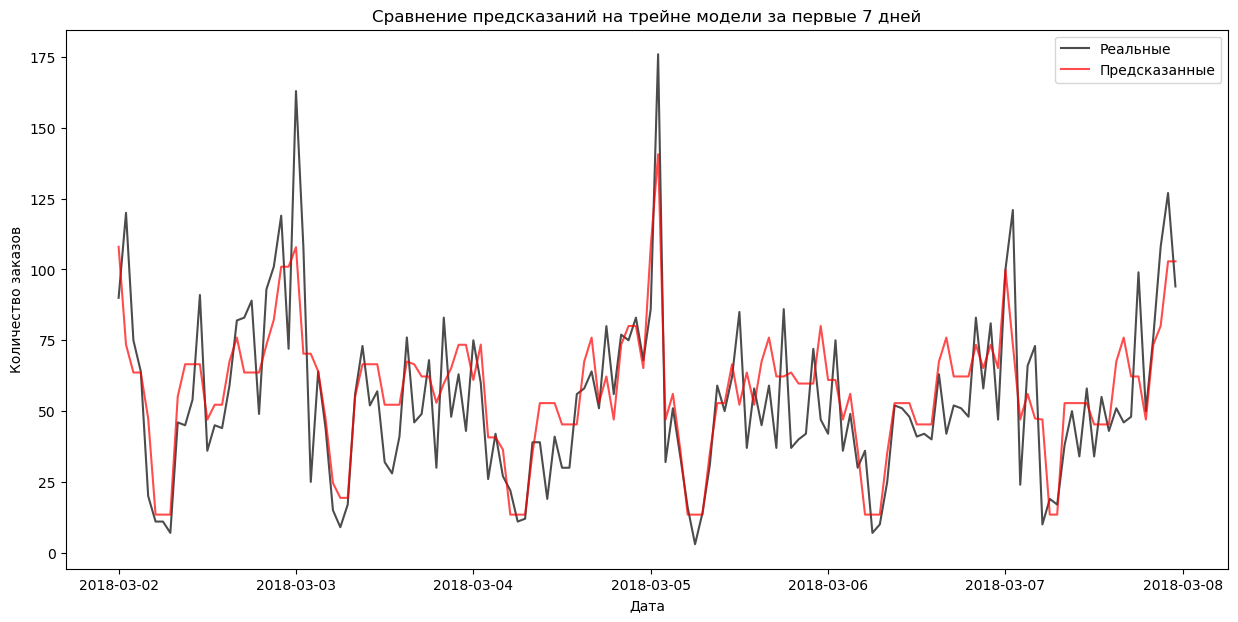

In [29]:
# зададим рандомные параметры

ran_grid_tree = {"max_depth": list(range(4, 10))}

dtr = DecisionTreeRegressor()

dtr_random = train_model(dtr, ran_grid_tree)

**Случайный лес**

Fitting 24 folds for each of 21 candidates, totalling 504 fits
GridSearchCV подбирал параметры 8.48 секунд
Лучшие параметры: {'max_depth': 8, 'n_estimators': 100}
RMSE обученной модели: 4.885105058264159
RMSE на тренировочной выборке: 19.618643977132592


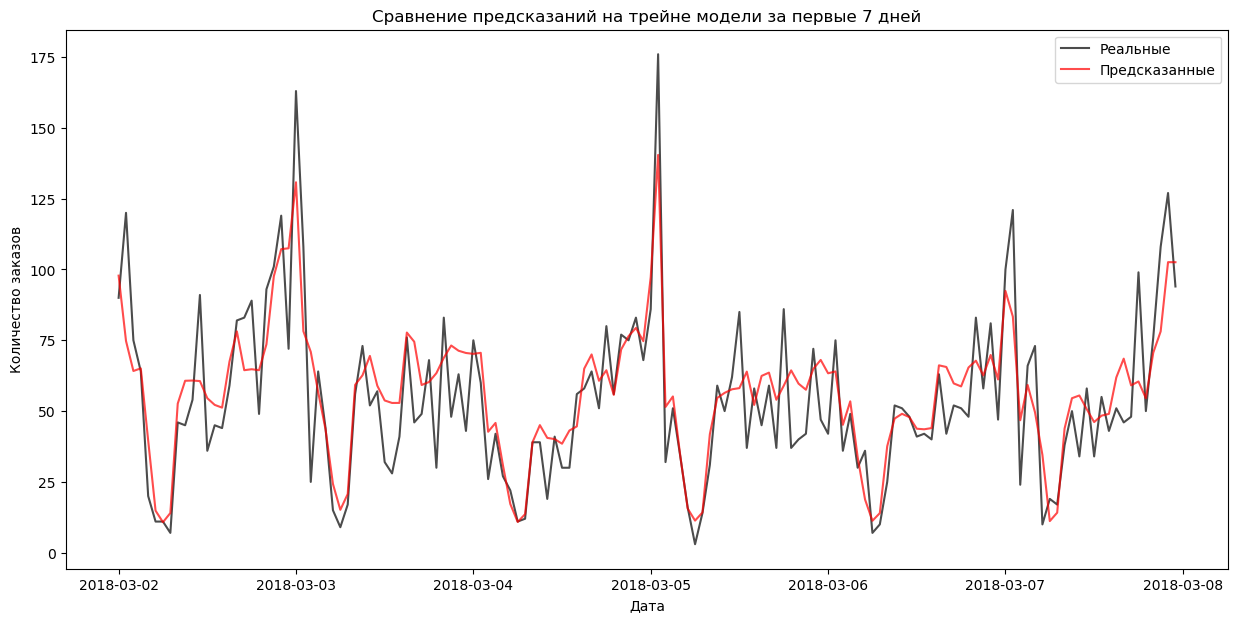

In [30]:
# зададим рандомные параметры

ran_grid_forest = {
    'max_depth': list(range(2, 9)),
    'n_estimators': [50, 100, 200]
}

rfr = RandomForestRegressor(n_jobs=-1)

rfr_random = train_model(rfr, ran_grid_forest) # обучим и сохраним значения

**LightGBM**

Fitting 24 folds for each of 15 candidates, totalling 360 fits
GridSearchCV подбирал параметры 1.05 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 10}
RMSE обученной модели: 4.812624073521748
RMSE на тренировочной выборке: 17.36408682552842


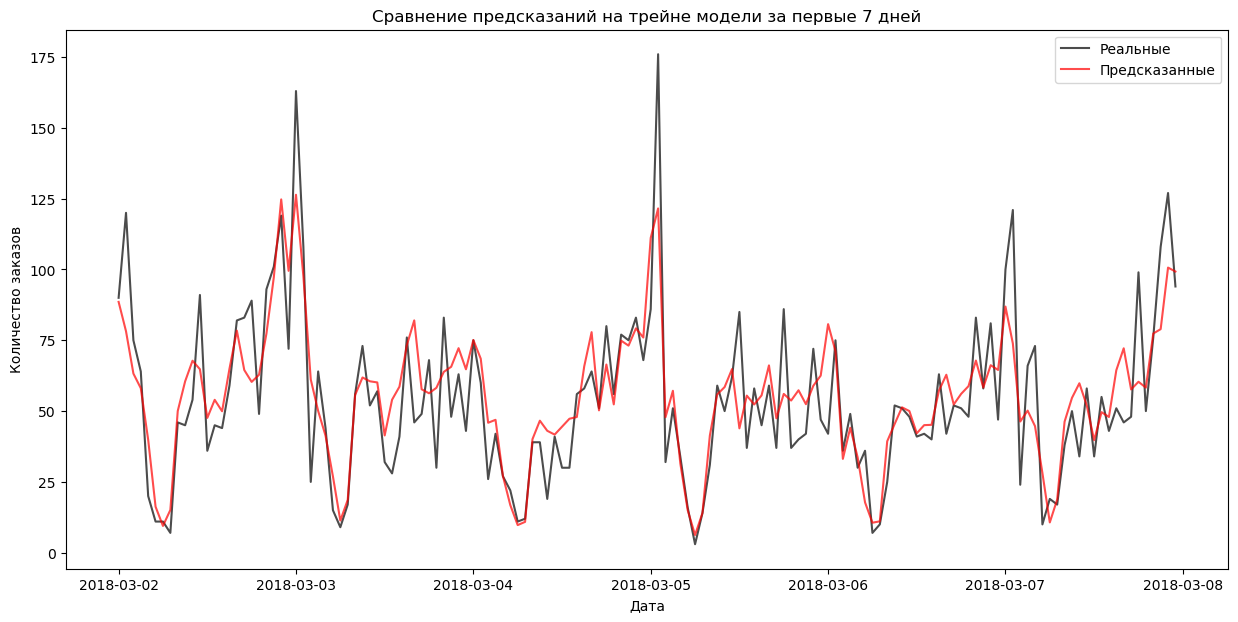

In [31]:
rand_lgbm_param = {
    'max_depth': [5, 10, 15, 25, 35],
    'learning_rate': [0.01, 0.1, 0.15]
}

gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'RMSE')

gbm_random = train_model(gbm, rand_lgbm_param)

**XGBoost**

Fitting 24 folds for each of 24 candidates, totalling 576 fits
GridSearchCV подбирал параметры 3.63 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5}
RMSE обученной модели: 4.862758730977693
RMSE на тренировочной выборке: 17.5753648997937


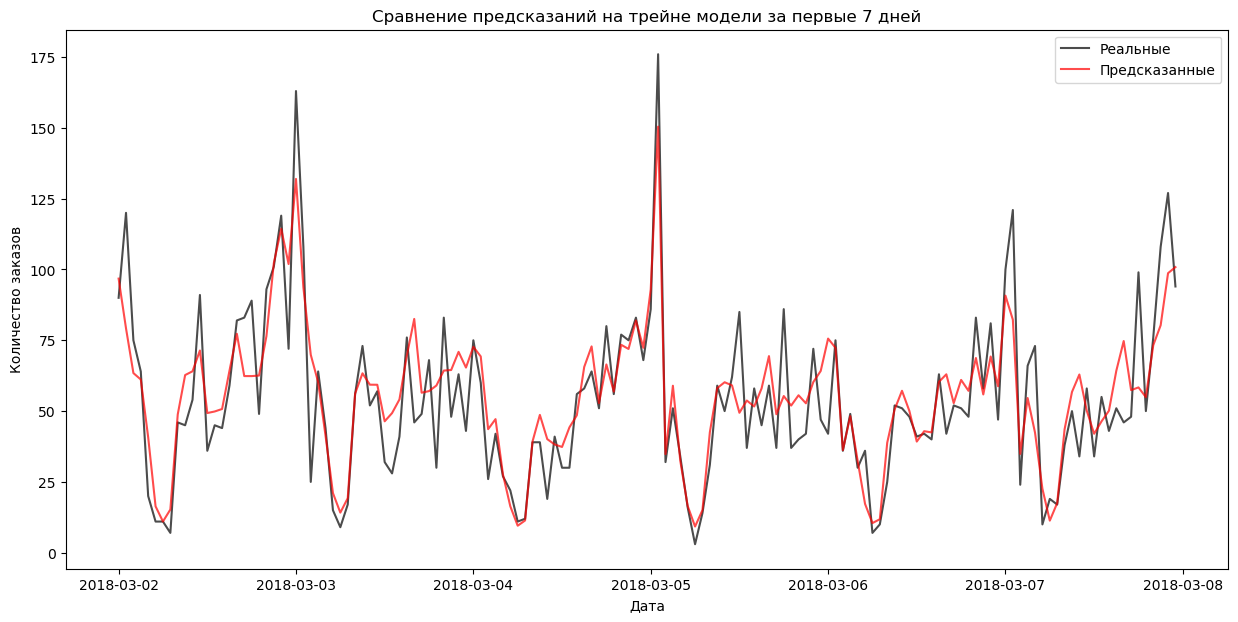

In [32]:
rand_xgb_param = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.15, 0.3]
}

xb = xgb.XGBRegressor(booster='gbtree', 
                      eval_metric='rmse', 
                      use_rmm=True,
                     verbosity=0)

xb_random = train_model(xb, rand_xgb_param)

**CatBoost**

Fitting 24 folds for each of 5 candidates, totalling 120 fits
GridSearchCV подбирал параметры 11.46 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3}
RMSE обученной модели: 4.836968238621881
RMSE на тренировочной выборке: 18.15708801561901


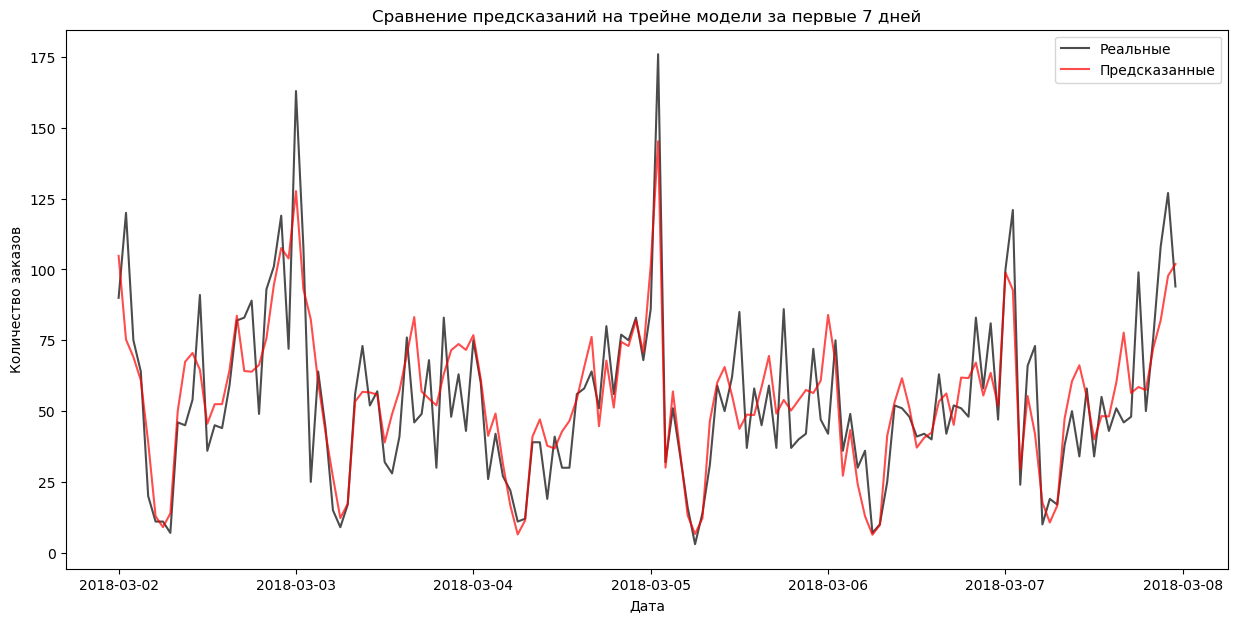

In [33]:
rand_cat_param = {
    'max_depth': [1, 2, 3, 4, 5],
    'learning_rate': [0.1]
}

cat = CatBoostRegressor(verbose=False) 


cat_random = train_model(cat, rand_cat_param)

,model,RMSE_model,RMSE_on_train,names
0,DecisionTreeRegressor(),5.188931,22.661587,DecisionTree
1,RandomForestRegressor(n_jobs=-1),4.885105,19.618644,RandomForest
2,"LGBMRegressor(metric='RMSE', objective='regres...",4.812624,17.364087,LightGBM
3,"XGBRegressor(base_score=None, booster='gbtree'...",4.862759,17.575365,XGBoost
4,<catboost.core.CatBoostRegressor object at 0x0...,4.836968,18.157088,CatBoost


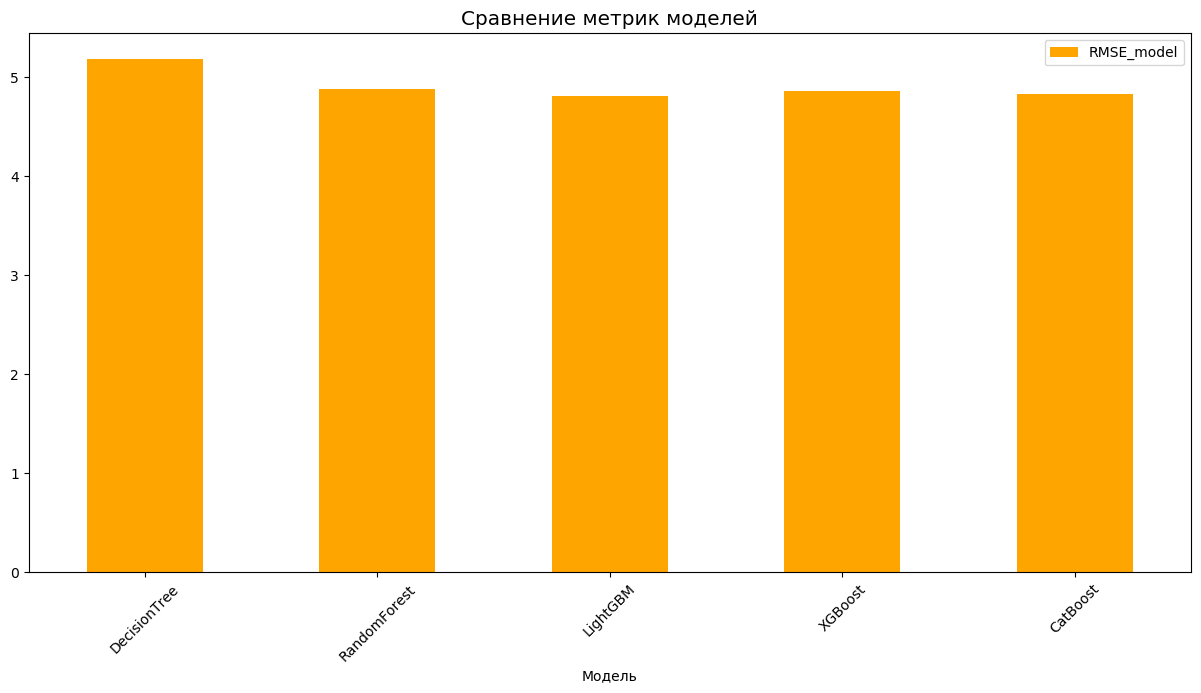

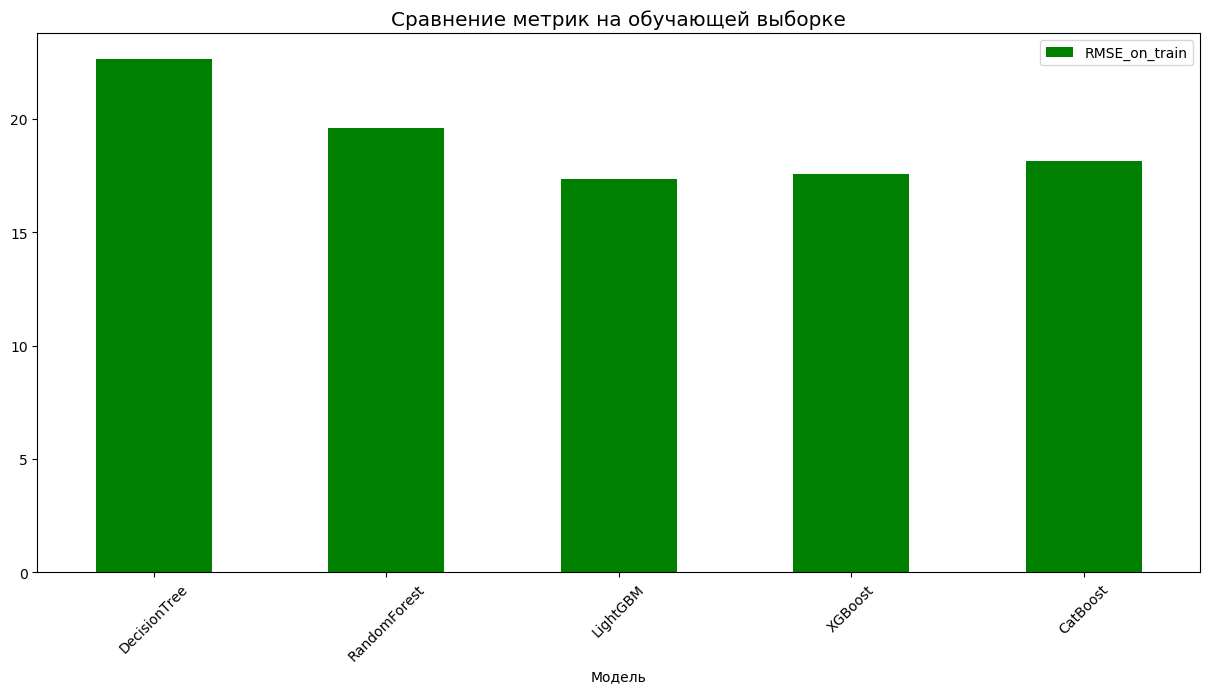

In [34]:
all_names = pd.DataFrame({'names':['DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost', 'CatBoost']})
analisys = pd.concat([analisys, all_names], axis=1, join='inner')
display(analisys)

analisys.plot.bar(y='RMSE_model', x='names', rot=45, figsize=(15,7), color='orange')
plt.title('Сравнение метрик моделей', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

analisys.plot.bar(y='RMSE_on_train', x='names', rot=45, figsize=(15,7), color='green')
plt.title('Сравнение метрик на обучающей выборке', fontsize='x-large')
plt.xlabel('Модель')
plt.show()

### Вывод
При сравнении моделей, на обучающей выборке лучше всего показала `LightGBM`, её будем использовать на тестовой выборке

## Тестирование

In [35]:
predicted = gbm_random.predict(test_features)
rmse_on_test = mean_squared_error(test_target, predicted, squared=False)
print('RMSE на тестовой выборке при использовании RandomizedSearchCV:', rmse_on_test)

RMSE на тестовой выборке при использовании RandomizedSearchCV: 43.506108154224414


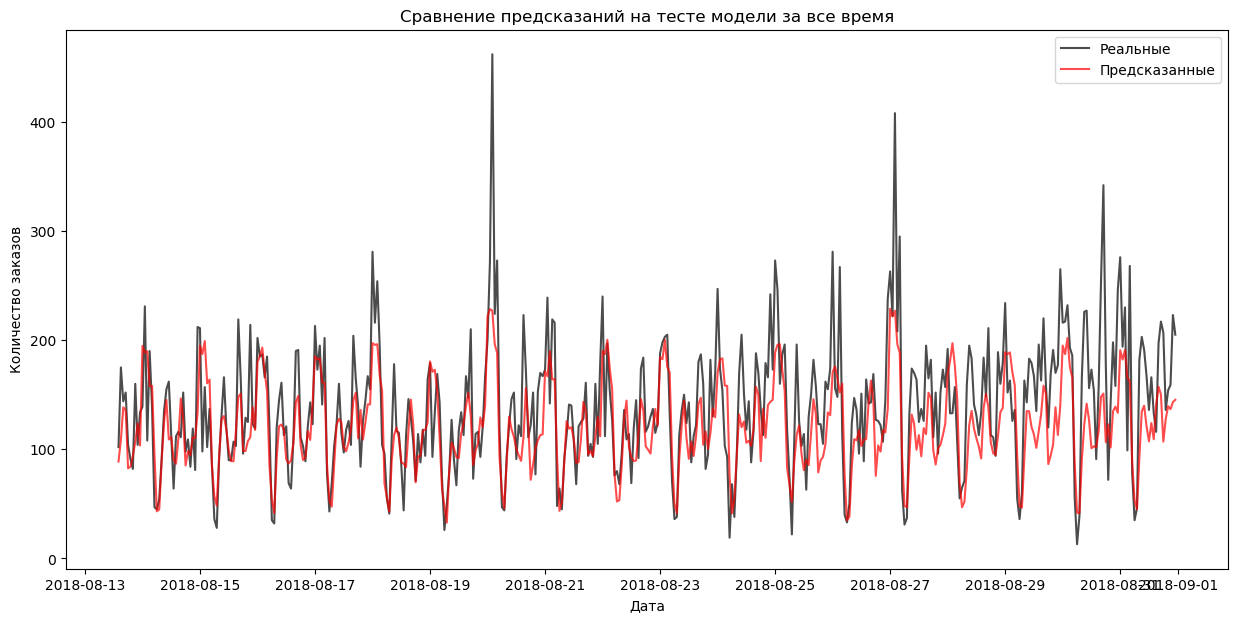

In [36]:
predicted = pd.DataFrame(predicted, index=test_features.index)

plt.figure(figsize=(15,7))
plt.plot(test_target, color='black', alpha=0.7)
plt.plot(predicted, color='red', alpha=0.7)
plt.title('Сравнение предсказаний на тесте модели за все время')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.legend(['Реальные', 'Предсказанные'])
plt.show()

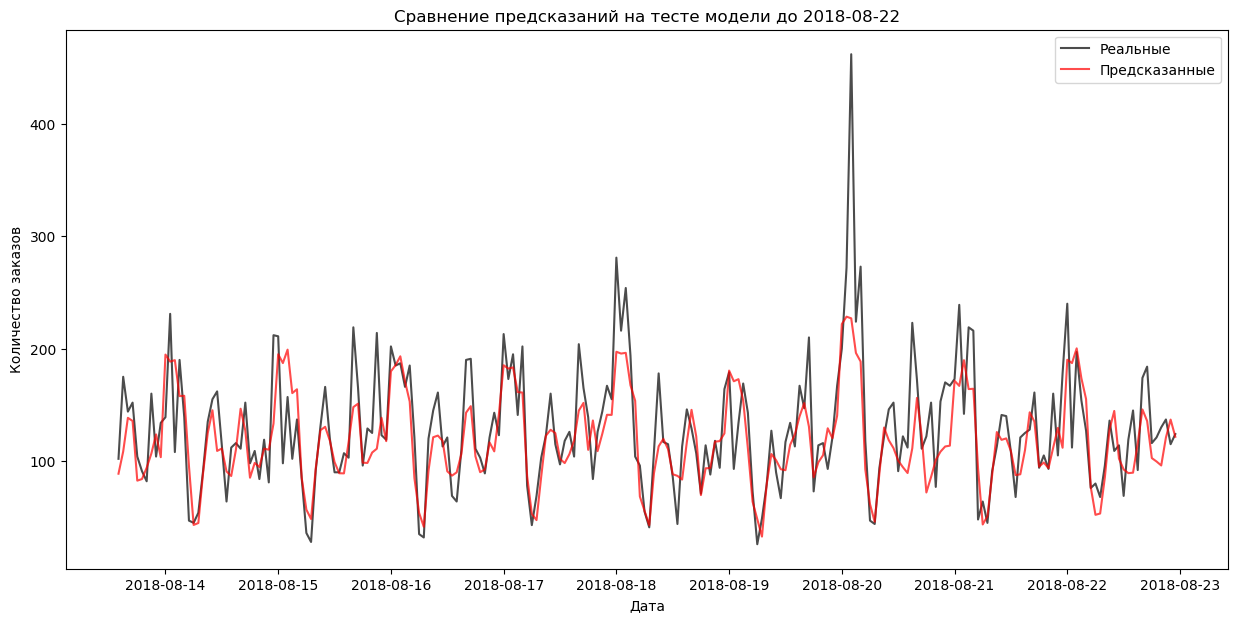

In [37]:
plt.figure(figsize=(15,7))
plt.plot(test_target[:'2018-08-22'], color='black', alpha=0.7)
plt.plot(predicted[:'2018-08-22'], color='red', alpha=0.7)
plt.title('Сравнение предсказаний на тесте модели до 2018-08-22')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.legend(['Реальные', 'Предсказанные'])
plt.show()

## Общий вывод
`RMSE` на тестовой выборке получилась `43.5`. В конце, когда происходит увеличение тренда, модель предсказывыет не совем точно, т.к. она не обучалась на изменениях тренда.